# Calculating Gains

This jupter notebook contain the scripts for finding the optimal gains using optimization algoritms

In [1]:
# Importing libraries
from simulation import run_simulation, desired_trajectory
import numpy as np
import scipy
from IPython.display import clear_output

In [2]:
history = {
    "iteration": [],
    "gains": [],
    "cost": []
}
iteration = 0

def cost_function(gains, time_s, dt=0.005):
    global iteration 
    global history

    log = run_simulation(time_s, dt, gains, desired_trajectory)

    cost = np.sum(log["error"]**2)

    print(f"Iteration {iteration}")
    if not np.isfinite(cost):
        cost = 1e12  # penaliza quando explode
        print(f"Cost is Inf, sending {cost}")
    else:
        print(f"Cost {cost}")
    print(f"Gains {gains}")
    print("------------------------------------------")

    if iteration % 3 == 0:  # limpa a cada 5 iterações
        clear_output(wait=True)

    # saving iteration data
    history["iteration"].append(iteration)
    history["cost"].append(cost)
    history["gains"].append(gains.copy())  # corrigido
    iteration += 1

    return cost


In [3]:
from scipy.optimize import minimize

# using differential evolution as a start point
initial_guess = np.array([
    1800.0, 7000.0, 8000.0, 20000.0,
    50.0, 100.0, 50.0, 0.0,
    0.0, 0.0, 0.0, 9000.0
])

time_s = 5.0
dt = 0.005

# optimize
result = minimize(
    cost_function,
    initial_guess,
    args=(time_s, dt),
    method="Nelder-Mead",
    options={
        'maxiter': 50,
        'xatol': 1e-5,
        'fatol': 1e-5,
        'disp': True,
        'adaptive': True
    }
)

100%|██████████| 1000/1000 [00:08<00:00, 120.60it/s]


Iteration 91
Cost 0.04930841416299927
Gains [ 2.05521678e+03  7.32574967e+03  9.26461865e+03  2.02165398e+04
  5.45498028e+01  1.21313261e+02  4.86398436e+01 -1.77667983e-04
 -5.63755931e-04 -5.44561902e-04 -4.55988988e-04  7.94148078e+03]
------------------------------------------


100%|██████████| 1000/1000 [00:08<00:00, 118.50it/s]

Iteration 92
Cost 0.049461646983623674
Gains [ 1.96270651e+03  7.77410377e+03  9.10704622e+03  2.00318695e+04
  5.60087118e+01  1.20393582e+02  4.82024736e+01 -2.38376722e-04
 -5.93655057e-04 -4.80623134e-04 -5.30977138e-04  8.25904695e+03]
------------------------------------------



/tmp/ipykernel_1922825/1985060908.py:14: RuntimeWarning: Maximum number of iterations has been exceeded.
  result = minimize(


In [4]:
print("Nelder-Mead refined gains")
print(result.x)

Nelder-Mead refined gains
[ 2.05521678e+03  7.32574967e+03  9.26461865e+03  2.02165398e+04
  5.45498028e+01  1.21313261e+02  4.86398436e+01 -1.77667983e-04
 -5.63755931e-04 -5.44561902e-04 -4.55988988e-04  7.94148078e+03]


100%|██████████| 3000/3000 [00:24<00:00, 121.02it/s]


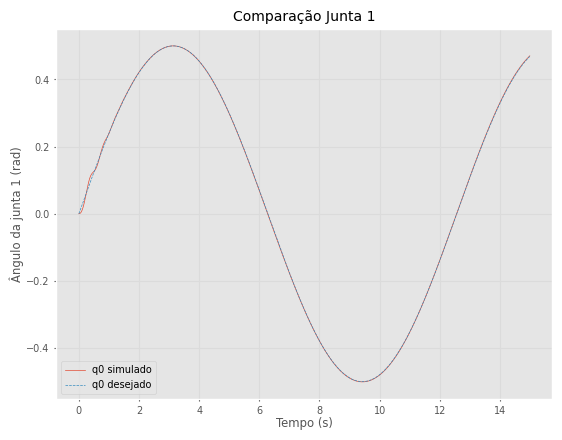

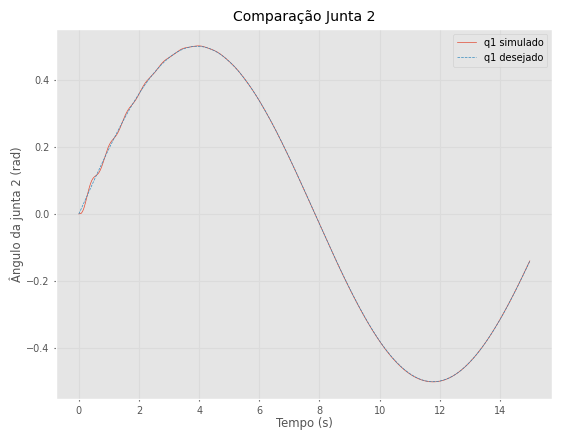

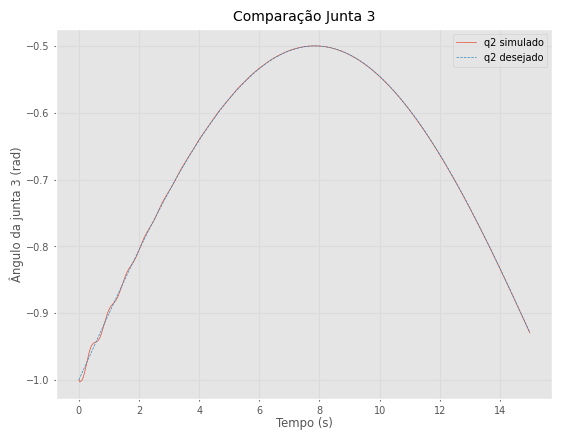

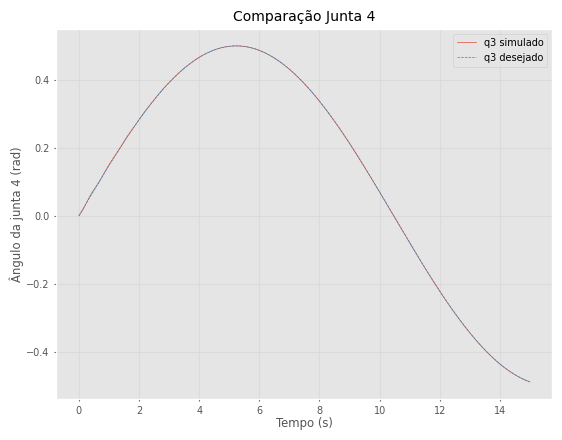

In [5]:
from matplotlib import pyplot as plt

gains = result.x

log = run_simulation(15.0, 0.005, gains, desired_trajectory)

q_ref = np.array([desired_trajectory(t) for t in log["timestamp"]])

for j in range(4):
    plt.figure()
    plt.plot(log["timestamp"], log["q"][:, j], label=f"q{j} simulado")
    plt.plot(log["timestamp"], q_ref[:, j], '--', label=f"q{j} desejado")
    plt.xlabel("Tempo (s)")
    plt.ylabel(f"Ângulo da junta {j+1} (rad)")
    plt.legend()
    plt.title(f"Comparação Junta {j+1}")
    plt.show()

100%|██████████| 3000/3000 [00:24<00:00, 121.22it/s]


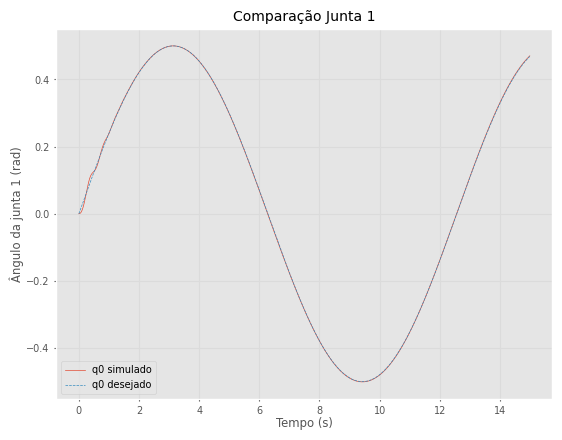

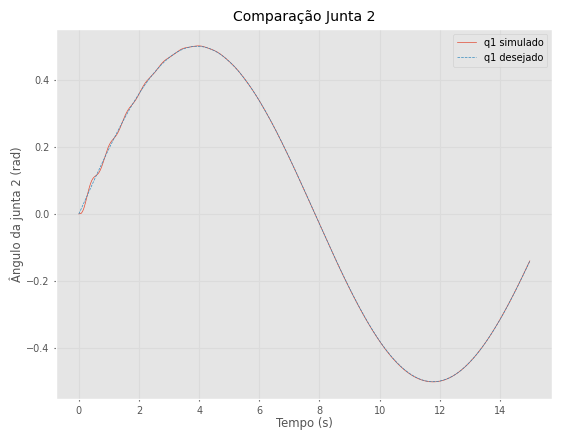

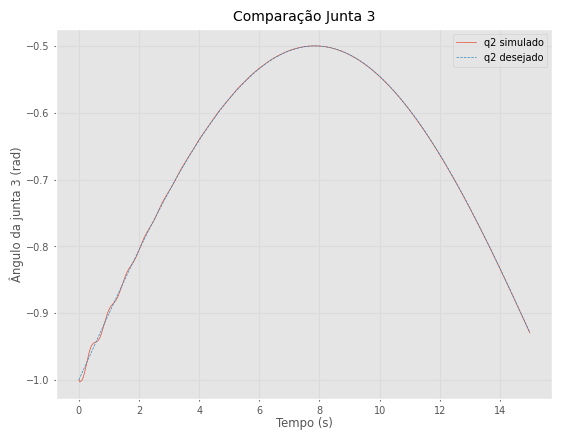

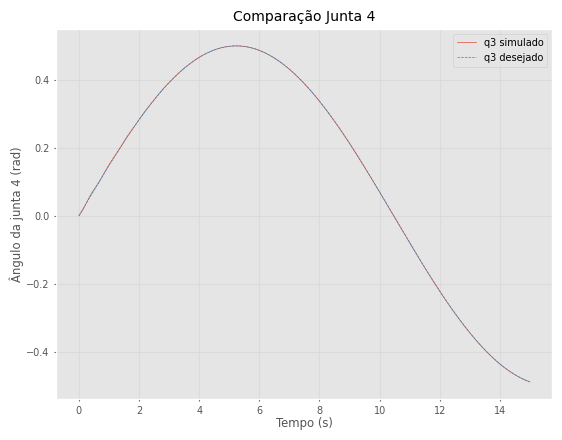

In [6]:
# old gains
old_gains = initial_guess

log_old_gains = run_simulation(15.0, 0.005, old_gains, desired_trajectory)

q_ref = np.array([desired_trajectory(t) for t in log["timestamp"]])

for j in range(4):
    plt.figure()
    plt.plot(log["timestamp"], log["q"][:, j], label=f"q{j} simulado")
    plt.plot(log["timestamp"], q_ref[:, j], '--', label=f"q{j} desejado")
    plt.xlabel("Tempo (s)")
    plt.ylabel(f"Ângulo da junta {j+1} (rad)")
    plt.legend()
    plt.title(f"Comparação Junta {j+1}")
    plt.show()

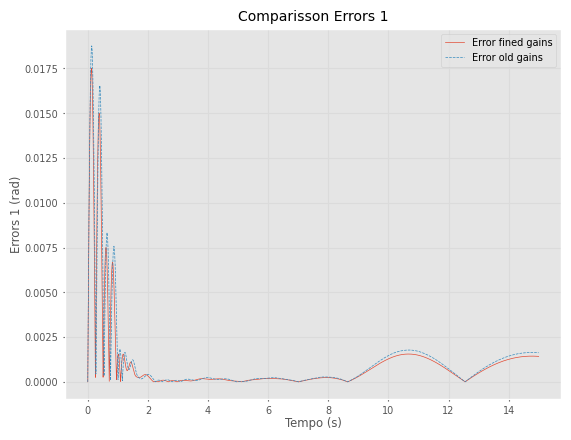

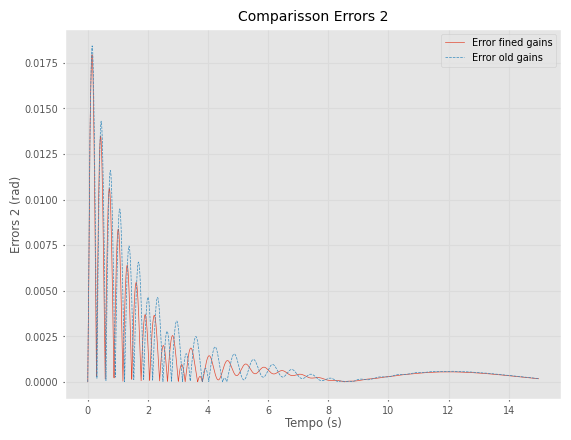

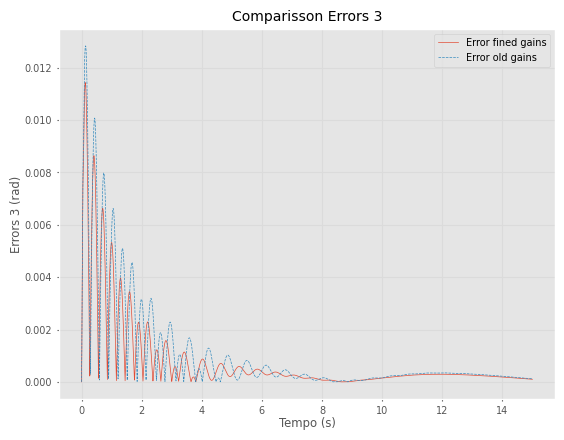

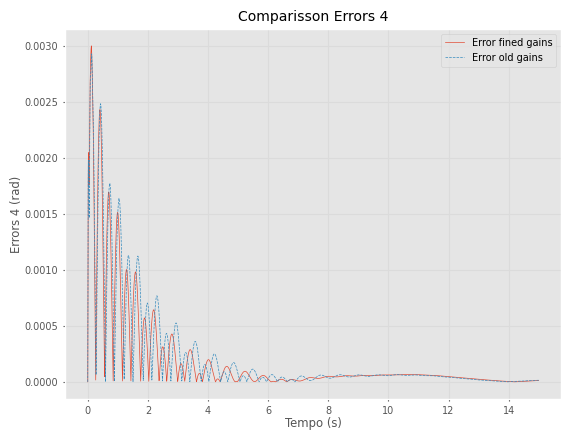

In [7]:
# comparing errors
for j in range(4):
    plt.figure()
    plt.plot(log["timestamp"], np.abs(log["error"][:, j]), label=f"Error fined gains")
    plt.plot(log_old_gains["timestamp"], np.abs(log_old_gains["error"][:, j]), '--', label=f"Error old gains")
    plt.xlabel("Tempo (s)")
    plt.ylabel(f"Errors {j+1} (rad)")
    plt.legend()
    plt.title(f"Comparisson Errors {j+1}")
    plt.show()

In [8]:
abs_erro_old_gain = np.abs(log_old_gains["error"])
abs_erro_refined_gain = np.abs(log["error"])
print("Sum of absolute errors")
print(f"Old gains: {np.sum(abs_erro_old_gain)}")
print(f"Refined gains: {np.sum(abs_erro_refined_gain)}")

Sum of absolute errors
Old gains: 11.517434564748555
Refined gains: 9.735505049381914
